In [6]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random
import seaborn as sns

### Method Of Moments

In [7]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [8]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

In [9]:
x

array([[3.28426550e+00, 8.16336780e-03, 3.18548348e+00, ...,
        4.58464437e-06, 1.81412477e-02, 8.80869984e-02],
       [3.31118068e+00, 8.15715483e-03, 3.08988304e+00, ...,
        4.51222905e-06, 2.10026945e-02, 8.90321941e-02],
       [3.29887611e+00, 8.17795564e-03, 2.98344984e+00, ...,
        4.46572024e-06, 2.10032969e-02, 8.89749987e-02],
       ...,
       [3.30444535e+00, 8.20387077e-03, 2.90119438e+00, ...,
        4.50657925e-06, 1.91350286e-02, 8.99913236e-02],
       [3.31822436e+00, 8.36227579e-03, 3.02560751e+00, ...,
        4.46899543e-06, 1.87060405e-02, 8.86326241e-02],
       [3.29240777e+00, 8.34162447e-03, 3.15132294e+00, ...,
        4.44441297e-06, 2.01915230e-02, 8.88721364e-02]])

In [5]:
x[0:5]

array([[3.28426550e+00, 8.16336780e-03, 3.18548348e+00, 1.33494234e+01,
        4.57240717e+05, 7.48877190e-01, 4.58464437e-06, 1.81412477e-02,
        8.80869984e-02],
       [3.31118068e+00, 8.15715483e-03, 3.08988304e+00, 1.33524837e+01,
        4.62693020e+05, 8.74636072e-01, 4.51222905e-06, 2.10026945e-02,
        8.90321941e-02],
       [3.29887611e+00, 8.17795564e-03, 2.98344984e+00, 1.33415638e+01,
        4.53306553e+05, 7.82253819e-01, 4.46572024e-06, 2.10032969e-02,
        8.89749987e-02],
       [3.30094737e+00, 8.19295622e-03, 2.94695127e+00, 1.33583849e+01,
        4.55989914e+05, 7.47865583e-01, 4.52015271e-06, 1.88318071e-02,
        8.65308976e-02],
       [3.29900886e+00, 8.40540077e-03, 3.01462703e+00, 1.33451841e+01,
        4.53780172e+05, 8.82674895e-01, 4.44655156e-06, 2.08835011e-02,
        8.87749948e-02]])

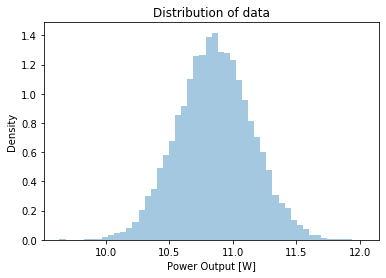

In [10]:
test = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel = "Power Output [W]", label="Density")
test.set_title('Distribution of data')
test.set_ylabel('Density')
plt.savefig('Data/Plots/hist_simulation.png')

In [11]:
from MoM_class import Method_of_Moments

In [12]:
MoM = Method_of_Moments(simulation)

In [13]:
mu = MoM.get_moments(simulation)['mean']
mu

10.856260930361984

In [14]:
MoM.get_moments(simulation)

{'mean': 10.856260930361984,
 'variance': 0.08520823726259495,
 'skew': 0.011840459453568647,
 'kurtosis': -0.00729655268824958}

In [15]:
MoM.uniform_from_moments()

(9.63191571754346, 2.4018382549794683)

In [16]:
MoM.beta_from_moments()

(8.114882819321245, 7.804349588385622, 9.63191571754346, 2.4018382549794683)

In [17]:
MoM.gamma_from_moments()

(17.592444677994557, 9.63191571754346, 0.06959494460425908)

In [18]:
MoM.norm_from_moments()

(10.856260930361984, 0.2919045002438211)

In [19]:
MoM.lognorm_from_moments()

(0.2593839246341573, 9.63191571754346, 1.1838432893836972)

In [1]:
def get_moments(data):
    moments={}
    moments['mean'] = np.mean(data)
    moments['variance'] = np.var(data)
    moments['skew'] = scipy.stats.skew(data)
    moments['kurtosis'] = scipy.stats.kurtosis(data)
    return moments

In [2]:
def uniform_from_moments(data):
    return min(simulation), max(simulation) - min(simulation)
    

In [3]:
# Reference Wackerly [Book Stat Methods]
def beta_from_moments(data):
    # Scale data
    beta_data = (data - min(data)) / (max(data) - min(data))
    
    # Moments of data
    moments = get_moments(beta_data)
    
    # Sample Measures
    Y_bar = moments['mean']
    s2 = moments['variance']
    
    # Distribution Parameters
    alpha = Y_bar * (Y_bar*(1 - Y_bar)/s2 - 1)
    beta = alpha * (1 - Y_bar) / Y_bar
    loc = min(data)
    scale = max(data) - min(data)
    
    return alpha, beta, loc, scale

In [4]:
def gamma_from_moments(data):
    # Scale data
    gamma_data = data - min(data)
    
    # Moments of data
    moments = get_moments(gamma_data)
    
    # Sample Measures
    Y_bar = moments['mean'] 
    n = len(data)
    
    # Distribution Parameters
    alpha = Y_bar**2 / moments['variance']
    beta = Y_bar / alpha
    loc = min(data)
    
    return alpha, loc, beta

In [5]:
def norm_from_moments(data):
    # Moments of data
    moments = get_moments(data)
    
    # Distribution Parameters
    mu = moments['mean']
    sigma = moments['variance']**0.5
    
    return mu, sigma

In [28]:
def lognorm_from_moments(data):
    #Scale Data
    lognorm_data = data - min(data)

    # Moments of data
    moments = get_moments(lognorm_data)

    # Sample Measures
    Y_bar = moments['mean']
    s2 = moments['variance']

    # Distribution parameters
    mu = math.log(Y_bar) - 0.5*math.log(s2/Y_bar + 1)
    sigma2 = math.log(s2/Y_bar + 1)
    
    return sigma2**0.5, min(data), math.exp(mu)

In [20]:
params_gamma = gamma_from_moments(simulation)
simulation.sort()

**Log Likelihood of FIT**

In [21]:
### Log Likelihood
np.sum(np.log(scipy.stats.gamma.pdf(simulation[1:], *params_gamma)))

-4263.045797370007

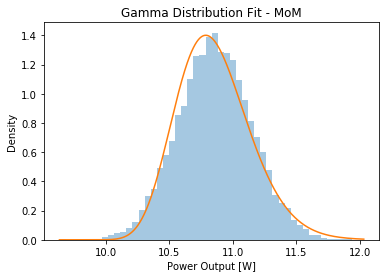

In [22]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MoM')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Gamma.png')

In [23]:
params_beta = beta_from_moments(simulation)
params_beta

(8.114882819321245, 7.804349588385622, 9.63191571754346, 2.4018382549794683)

In [24]:
np.sum(np.log(scipy.stats.beta.pdf(simulation[1:-1], *params_beta)))

-3832.257685716

In [ ]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MoM')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Beta.png')

In [31]:
params_normal = norm_from_moments(simulation)
params_normal

(10.856260930361984, 0.2919045002438211)

In [32]:
np.sum(np.log(scipy.stats.norm.pdf(simulation[1:-1], *params_normal)))

-3735.8916474951557

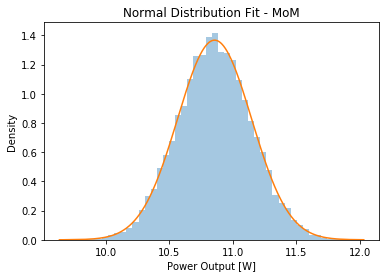

In [33]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Normal.png')

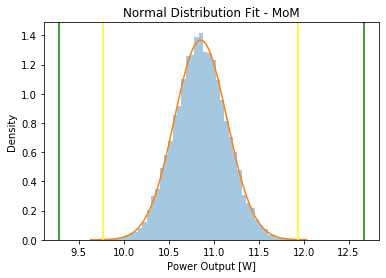

In [44]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.axvline(x=9.28592305, color='green')
plt.axvline(x=12.66975792, color='green')
plt.axvline(x=9.77066328, color='yellow')
plt.axvline(x=11.94185858, color='yellow')
plt.savefig('Data/Plots/CP.png')
plt.show()


In [ ]:
params_uniform = uniform_from_moments(simulation)
params_uniform

In [ ]:
uniform_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.uniform.pdf(simulation, *params_uniform))
uniform_fit.set_title('Uniform Distribution Fit - MoM')
uniform_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Uniform.png')

In [29]:
params_lognorm = lognorm_from_moments(simulation)
params_lognorm

(0.2593839246341573, 9.63191571754346, 1.1838432893836972)

In [30]:
np.sum(np.log(scipy.stats.lognorm.pdf(simulation[1:-1], *params_lognorm)))

-4874.954497072198

In [ ]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MoM')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Lognorm.png')

In [ ]:
def log_likelihood_foo(data, parameters):
    return np.sum(np.log(dist.pdf(data[1:-1], *parameters)))

def get_parameters(data, method, distribution):
    if method == 'MLE':
        dist = getattr(scipy.stats, distribution)
        return dist.fit(data)
    else: #'MoM'
        MoM = Method_of_Moments(data)
        method_to_call = getattr(Method_of_Moments, distribution + '_from_moments')
        return MoM.method_to_call()